# Heart Disease Risk Prediction Using Logistic Regression

**objectives:**
Perform comprehensive EDA to understand feature relationships
- Implement logistic regression from scratch and using sklearn
- Compare regularization techniques (L1, L2, Elastic Net)
- Deploy model to AWS SageMaker for real-time inference
- Provide actionable clinical insights

## Setup


In [96]:
# Install required libraries (run this once if needed)
# %pip install numpy pandas matplotlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Load and Prepare the Dataset

In [97]:
df = pd.read_csv("Heart_Disease_Prediction.csv")
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [98]:
# Binarize the Heart Disease column
df["Heart Disease"] = df["Heart Disease"].map({"Presence": 1, "Absence": 0})
print(df)

# Clean column names
df.columns = df.columns.str.replace(" ", "_")
df.columns = df.columns.str.replace("-", "_")

print("\nTarget distribution:")
print(df['Heart_Disease'].value_counts())
print(f"\nDisease presence rate: {df['Heart_Disease'].mean():.2%}")

     Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0     70    1                4  130          322             0            2   
1     67    0                3  115          564             0            2   
2     57    1                2  124          261             0            0   
3     64    1                4  128          263             0            0   
4     74    0                2  120          269             0            2   
..   ...  ...              ...  ...          ...           ...          ...   
265   52    1                3  172          199             1            0   
266   44    1                2  120          263             0            0   
267   56    0                2  140          294             0            2   
268   57    1                4  140          192             0            0   
269   67    1                4  160          286             0            2   

     Max HR  Exercise angina  ST depression  Slope 

In [99]:
# Data types and missing values
print("Dataset Info:")
df.info()

print("\nMissing values:")
print(df.isnull().sum())

Dataset Info:
<class 'pandas.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest_pain_type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS_over_120             270 non-null    int64  
 6   EKG_results              270 non-null    int64  
 7   Max_HR                   270 non-null    int64  
 8   Exercise_angina          270 non-null    int64  
 9   ST_depression            270 non-null    float64
 10  Slope_of_ST              270 non-null    int64  
 11  Number_of_vessels_fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart_Disease            270 non-null    int64  
dtypes: float64(1), int64(13

In [100]:
# Statistical summary
df.describe()

,Age,Sex,Chest_pain_type,BP,Cholesterol,FBS_over_120,EKG_results,Max_HR,Exercise_angina,ST_depression,Slope_of_ST,Number_of_vessels_fluro,Thallium,Heart_Disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,1.000000


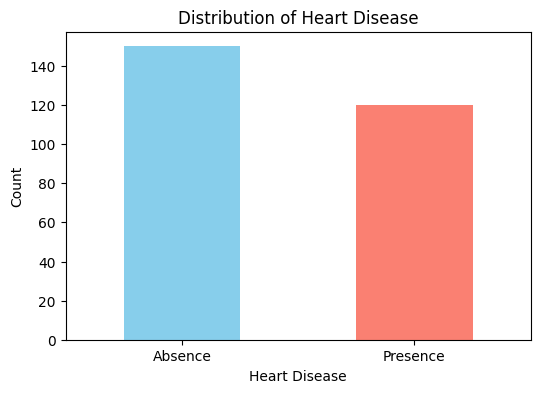

In [101]:
# Target variable distribution
plt.figure(figsize=(6,4))
df['Heart_Disease'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Absence', 'Presence'], rotation=0)
plt.show()

### Exploratory Data Analysis (EDA)

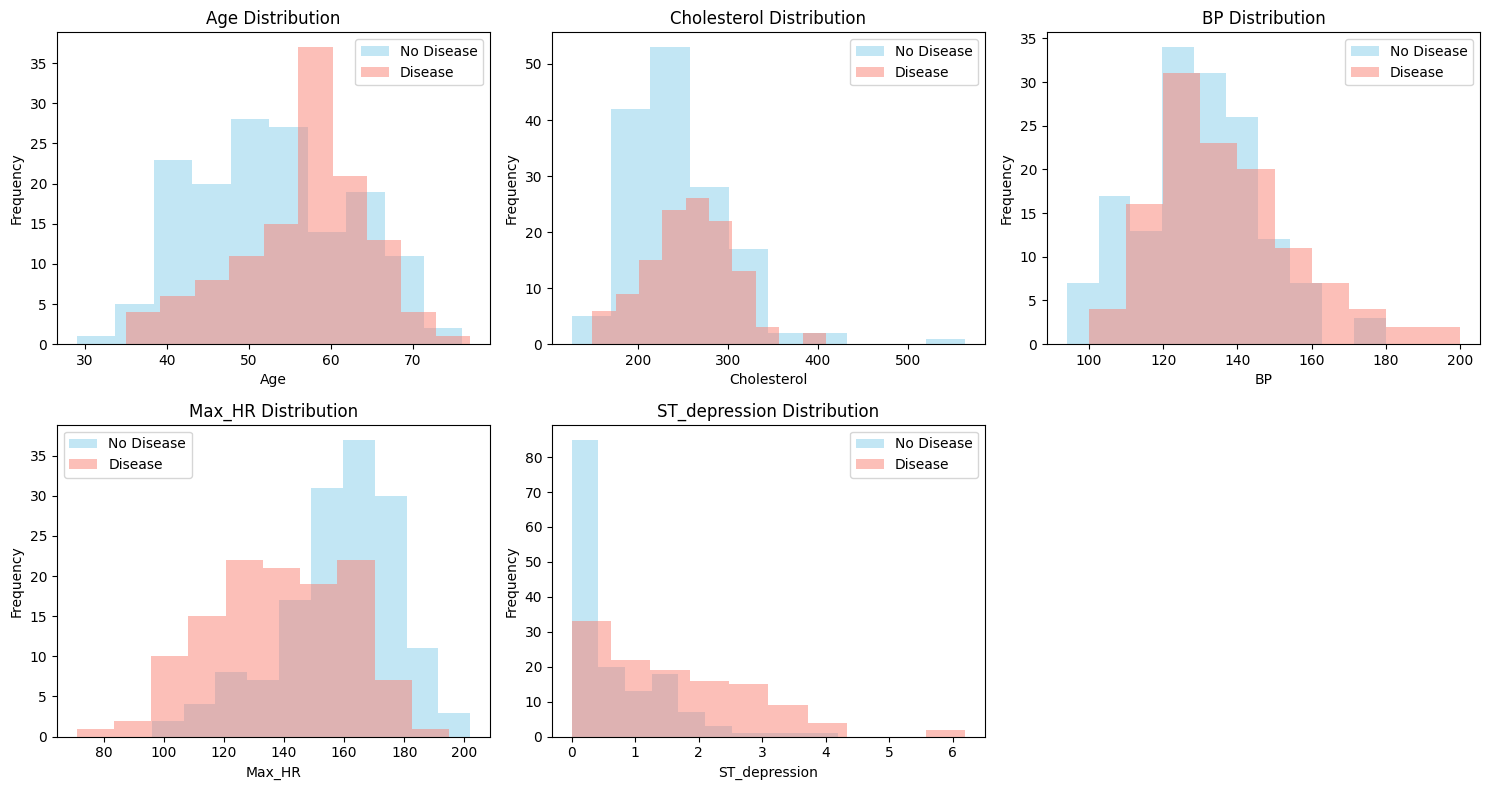

In [102]:
# Distribution of key numerical features
features_to_plot = ['Age', 'Cholesterol', 'BP', 'Max_HR', 'ST_depression']
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.ravel()
for i, feature in enumerate(features_to_plot):
    # Histogram by class
    axes[i].hist(df[df['Heart_Disease'] == 0][feature], alpha=0.5, label='No Disease', color='skyblue')
    axes[i].hist(df[df['Heart_Disease'] == 1][feature], alpha=0.5, label='Disease', color='salmon')
    axes[i].set_title(f'{feature} Distribution')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    axes[i].legend()
# Remove empty axis if any
if len(features_to_plot) < 6:
    axes[-1].axis('off')
plt.tight_layout()
plt.show()

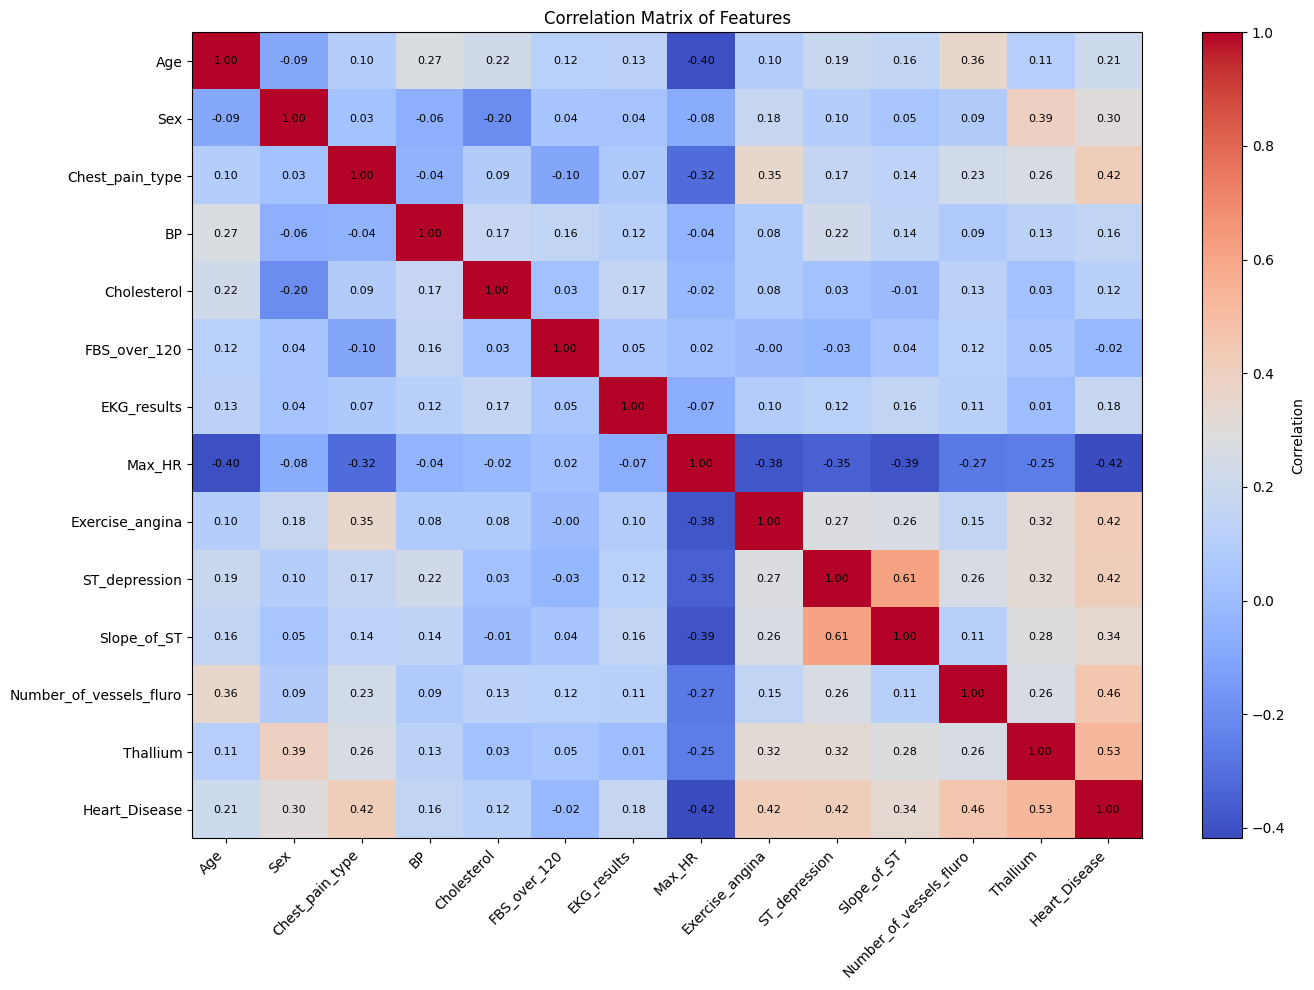

In [103]:
# Correlation matrix
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(14, 10))
plt.imshow(correlation_matrix, cmap='coolwarm', aspect='auto')
plt.colorbar(label='Correlation')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45, ha='right')
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix of Features')
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', 
                ha='center', va='center', color='black', fontsize=8)
plt.tight_layout()
plt.show()

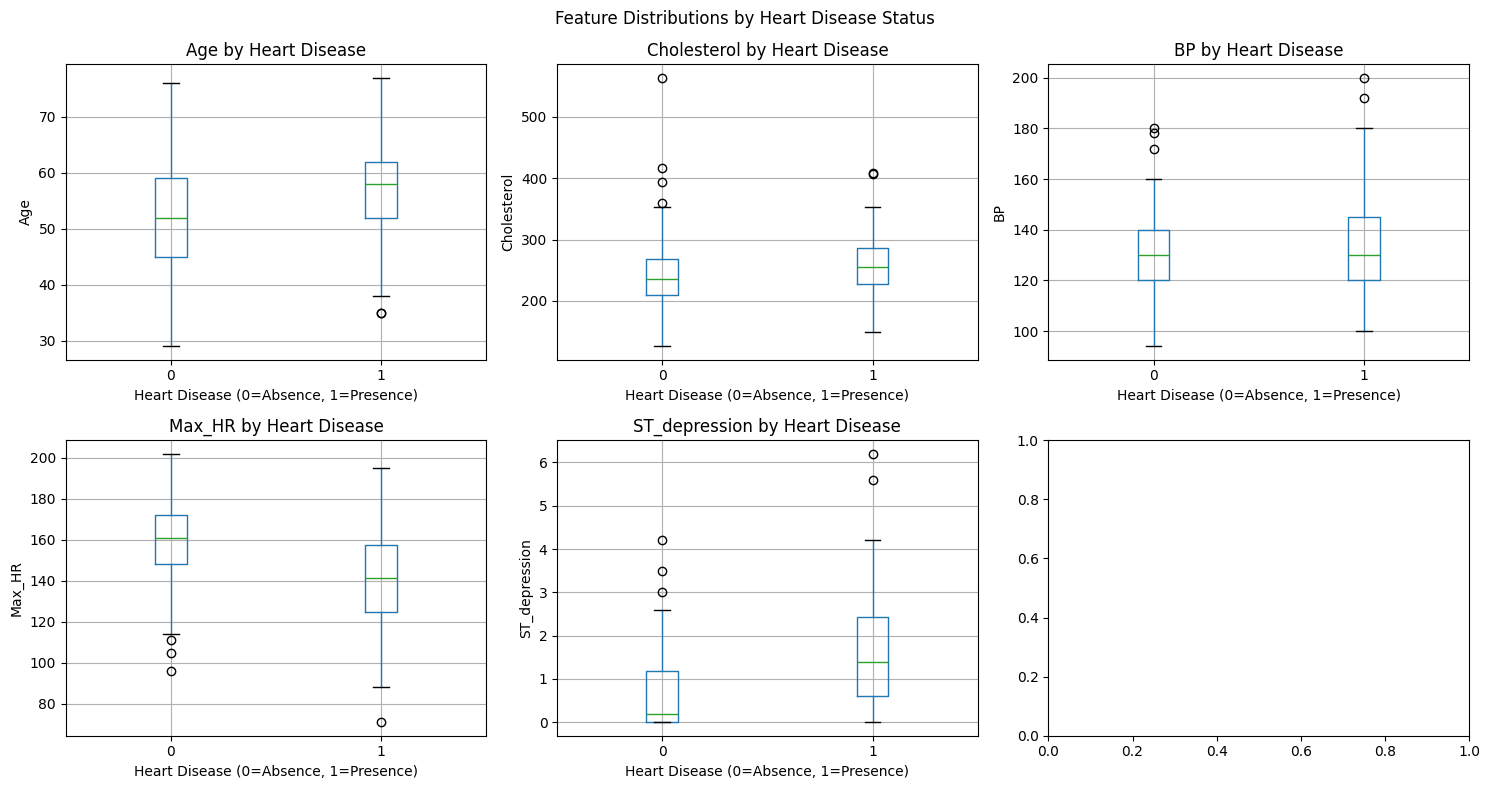

In [104]:
# Distribution of key features by disease presence
features_to_plot = ['Age', 'Cholesterol', 'BP', 'Max_HR', 'ST_depression']
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()
for idx, feature in enumerate(features_to_plot):
    df.boxplot(column=feature, by='Heart_Disease', ax=axes[idx])
    axes[idx].set_title(f'{feature} by Heart Disease')
    axes[idx].set_xlabel('Heart Disease (0=Absence, 1=Presence)')
    axes[idx].set_ylabel(feature)

plt.suptitle('Feature Distributions by Heart Disease Status')
plt.tight_layout()
plt.show()

###  Data Preprocessing
We'll select key features, perform train/test split (70/30), and normalize features.

In [105]:
# Select features based on clinical relevance and correlation analysis
selected_features = ['Age', 'Cholesterol', 'BP', 'Max_HR', 'ST_depression', 'Number_of_vessels_fluro']

X = df[selected_features].values # Matrix (m, n)
y = df['Heart_Disease'].values # Vector (m,)

print(f"Shape of X: {X.shape}") 
print(f"Shape of y: {y.shape}") 
print(f"Numbrer of features (n): {X.shape[1]}")
print(f"Number of examples (m): {X.shape[0]}")

Shape of X: (270, 6)
Shape of y: (270,)
Numbrer of features (n): 6
Number of examples (m): 270


In [106]:
# 70/30 train/test split with stratification
def stratified_split(X, y, test_size=0.3, random_state=42):
    np.random.seed(random_state)
    
   # Separate indexes by class
    class_0_idx = np.where(y == 0)[0]
    class_1_idx = np.where(y == 1)[0]
    
    # Mix
    np.random.shuffle(class_0_idx)
    np.random.shuffle(class_1_idx)
    
    # Calculate quantities for test
    n_test_0 = int(len(class_0_idx) * test_size)
    n_test_1 = int(len(class_1_idx) * test_size)
    
    # Test indices
    test_idx = np.concatenate([class_0_idx[:n_test_0], class_1_idx[:n_test_1]])
    train_idx = np.concatenate([class_0_idx[n_test_0:], class_1_idx[n_test_1:]])
    
    np.random.shuffle(test_idx)
    np.random.shuffle(train_idx)
    
    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]

# Apply split
X_train, X_test, y_train, y_test = stratified_split(X, y, test_size=0.3)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Train class distribution: {np.mean(y_train):.2%} disease")
print(f"Test class distribution: {np.mean(y_test):.2%} disease")

Training set: 189 samples
Test set: 81 samples
Train class distribution: 44.44% disease
Test class distribution: 44.44% disease


In [107]:
# Normalize features (standardization)
def normalize_features(X_train, X_test):
    mean = np.mean(X_train, axis=0)
    std = np.std(X_train, axis=0)
    std = np.where(std == 0, 1, std)
    
    X_train_norm = (X_train - mean) / std
    X_test_norm = (X_test - mean) / std
    
    return X_train_norm, X_test_norm, mean, std

X_train_norm, X_test_norm, train_mean, train_std = normalize_features(X_train, X_test)
print("Feature Normalize completed.")
print(f"Mean used for normalization: {train_mean}")
print(f"Std used for normalization: {train_std}")

Feature Normalize completed.
Mean used for normalization: [ 54.58201058 256.21693122 131.64550265 149.13227513   1.03809524
   0.67724868]
Std used for normalization: [ 9.29469862 52.76142299 18.4188839  23.37136279  1.1259933   0.96858641]


## 2. Implement Basic Logistic Regression

In [108]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, w, b):
    m, n = X.shape
    z = X @ w + b
    f = sigmoid(z)

    eps = 1e-8
    f_clipped = np.clip(f, eps, 1 - eps)

    J = -(1/m) * np.sum(
        y * np.log(f_clipped) + (1 - y) * np.log(1 - f_clipped)
    )
    return J
def compute_gradient(X, y, w, b):
    m, n = X.shape
    z = X @ w + b
    f = sigmoid(z)
    
    error = f - y

    dj_dw = (1/m) * (X.T @ error)
    dj_db = (1/m) * np.sum(error)
    
    return dj_dw, dj_db

def gradient_descent(X, y, w_init, b_init, alpha, num_iters, print_every=0):
    w = w_init.copy()
    b = b_init
    J_history = []
    
    for i in range(num_iters):
        # Compute gradients
        dj_dw, dj_db = compute_gradient(X, y, w, b)
        
        # Update parameters
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        if i % 100 == 0:
            J = compute_cost(X, y, w, b)
            J_history.append(J)
            
        if print_every > 0 and (i % print_every == 0 or i == num_iters - 1):
            J = compute_cost(X, y, w, b)
            print(f"Iteration {i:4d}: J(w,b) = {J:.6f}")
    
    return w, b, J_history

In [109]:
# Model training parameters
alpha = 0.01  # Learning rate
num_iters = 1000  # Number of iterations
w_init = np.zeros(X_train_norm.shape[1])  # Initial weights
b_init = 0.0  # Initial bias

print("Starting training...")
print(f"Learning rate (α): {alpha}")
print(f"Iteraciones: {num_iters}")
print(f"w inicial shape: {w_init.shape}")

Starting training...
Learning rate (α): 0.01
Iteraciones: 1000
w inicial shape: (6,)


In [110]:
# Train the model
w_opt, b_opt, J_history = gradient_descent(
    X_train_norm, y_train, w_init, b_init, alpha, num_iters, print_every=100
)

print("Training completed.")
print(f"Optimized weights: {w_opt}")
print(f"Optimized bias: {b_opt}")
print(f"Final cost: {J_history[-1]:.6f}")

Iteration    0: J(w,b) = 0.691248
Iteration  100: J(w,b) = 0.569719
Iteration  200: J(w,b) = 0.517415
Iteration  300: J(w,b) = 0.490250
Iteration  400: J(w,b) = 0.474064
Iteration  500: J(w,b) = 0.463469
Iteration  600: J(w,b) = 0.456060
Iteration  700: J(w,b) = 0.450625
Iteration  800: J(w,b) = 0.446493
Iteration  900: J(w,b) = 0.443264
Iteration  999: J(w,b) = 0.440708
Training completed.
Optimized weights: [ 0.06588571  0.17972803  0.41773347 -0.6336913   0.69155559  0.70491681]
Optimized bias: -0.19342106844167722
Final cost: 0.443264


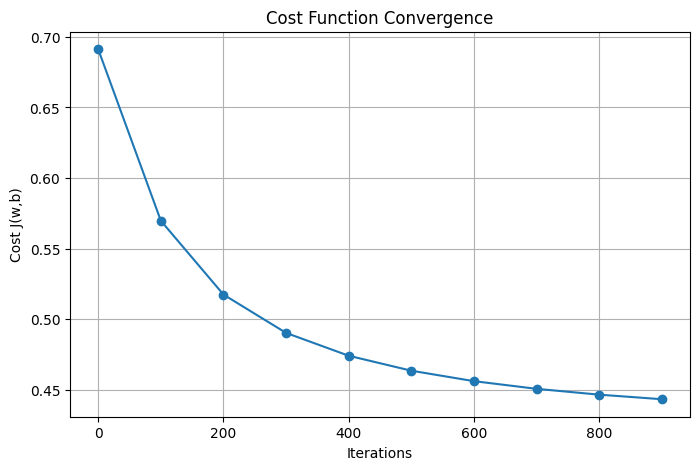

In [111]:
# Visualize convergence
plt.figure(figsize=(8, 5))
plt.plot(range(0, num_iters, 100), J_history, marker='o')
plt.title('Cost Function Convergence')
plt.xlabel('Iterations')
plt.ylabel('Cost J(w,b)')
plt.grid(True)
plt.show()

In [112]:
# Model Evaluation

def predict(X, w, b, threshold=0.5):
    probabilities = sigmoid(X @ w + b)
    return (probabilities >= threshold).astype(int)

def evaluate_predictions(y_true, y_pred, set_name=""):
    accuracy = np.mean(y_true == y_pred)
    
    # Precision, Recall, F1
    tp = np.sum((y_pred == 1) & (y_true == 1))
    fp = np.sum((y_pred == 1) & (y_true == 0))
    fn = np.sum((y_pred == 0) & (y_true == 1))
    
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    
    print(f"\nPerformance on {set_name}")
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-Score:  {f1:.4f}")
    print(f"TP: {tp}, FP: {fp}, FN: {fn}")
    
    return accuracy, precision, recall, f1

# Evaluate in training and testing
y_train_pred = predict(X_train_norm, w_opt, b_opt)
y_test_pred = predict(X_test_norm, w_opt, b_opt)

train_metrics = evaluate_predictions(y_train, y_train_pred, "Training Set")
test_metrics = evaluate_predictions(y_test, y_test_pred, "Test Set")


Performance on Training Set
Accuracy:  0.7778
Precision: 0.7917
Recall:    0.6786
F1-Score:  0.7308
TP: 57, FP: 15, FN: 27

Performance on Test Set
Accuracy:  0.7160
Precision: 0.7241
Recall:    0.5833
F1-Score:  0.6462
TP: 21, FP: 8, FN: 15


In [113]:
# Create metrics comparison table
metrics_df = pd.DataFrame(
    [train_metrics, test_metrics],
    columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    index=['Training Set', 'Test Set']
)
print("\nMetrics Comparison")
print(metrics_df)


Metrics Comparison
              Accuracy  Precision    Recall  F1-Score
Training Set  0.777778   0.791667  0.678571  0.730769
Test Set      0.716049   0.724138  0.583333  0.646154


## 3. Visualize Decision Boundaries

Visualizing decision boundaries for 3 pairs of features...


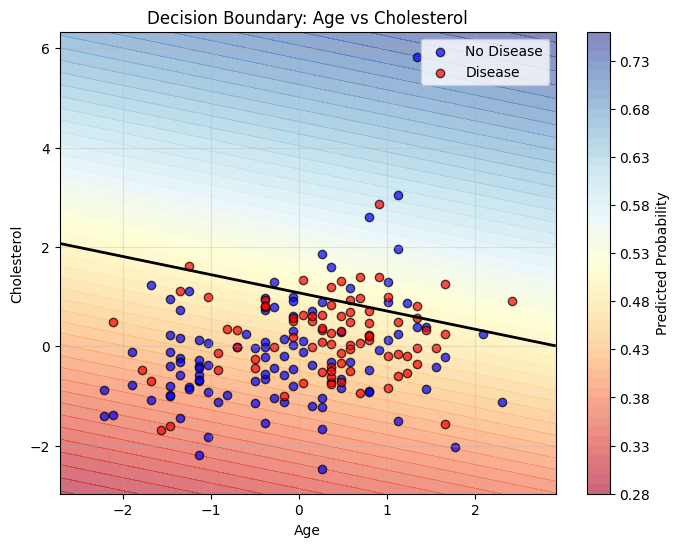

Equation of decision boundary: 0.0659*Age + 0.1797*Cholesterol + -0.1934 = 0


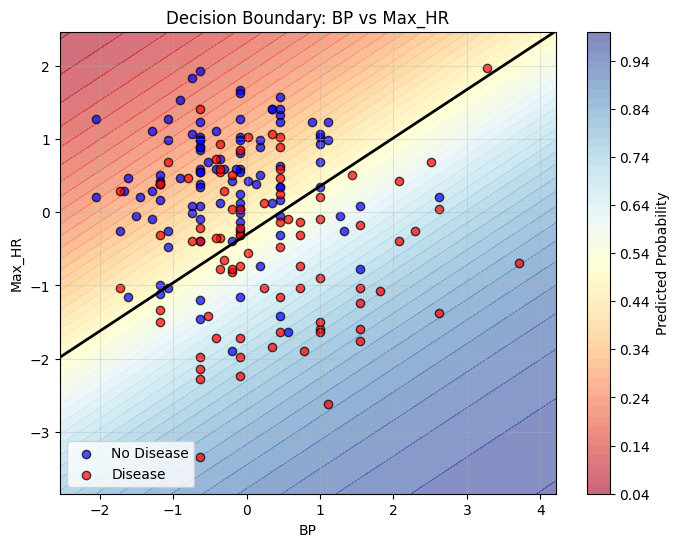

Equation of decision boundary: 0.4177*BP + -0.6337*Max_HR + -0.1934 = 0


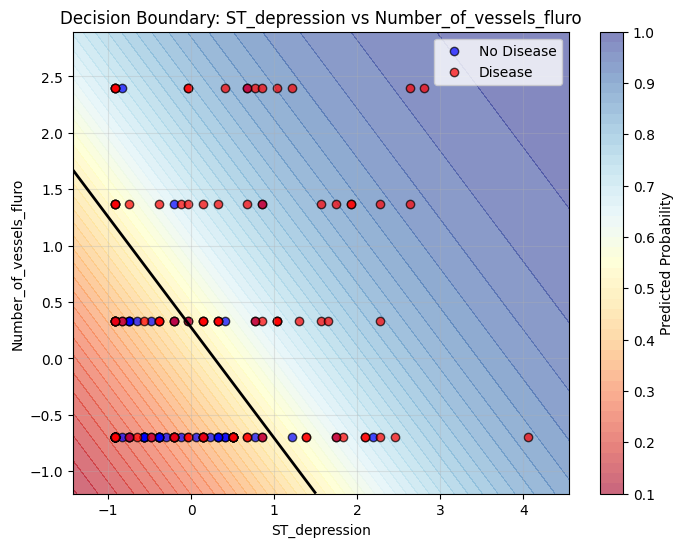

Equation of decision boundary: 0.6916*ST_depression + 0.7049*Number_of_vessels_fluro + -0.1934 = 0


In [114]:
def plot_decision_boundary_2d(X, y, w, b, feature_idx1, feature_idx2, feature_names):
    x1 = X[:, feature_idx1]
    x2 = X[:, feature_idx2]
    
    x1_min, x1_max = x1.min() - 0.5, x1.max() + 0.5
    x2_min, x2_max = x2.min() - 0.5, x2.max() + 0.5
    xx1, xx2 = np.meshgrid(
        np.linspace(x1_min, x1_max, 200),
        np.linspace(x2_min, x2_max, 200)
    )
    
    grid_points = np.c_[xx1.ravel(), xx2.ravel()]
    w_subset = np.array([w[feature_idx1], w[feature_idx2]])
    z_grid = grid_points @ w_subset + b
    probs_grid = sigmoid(z_grid).reshape(xx1.shape)
    
    plt.figure(figsize=(8, 6))
    plt.contourf(xx1, xx2, probs_grid, levels=50, cmap='RdYlBu', alpha=0.6)
    plt.colorbar(label='Predicted Probability')
    plt.contour(xx1, xx2, probs_grid, levels=[0.5], colors='black', linewidths=2)
    plt.scatter(x1[y == 0], x2[y == 0], color='blue', 
                label='No Disease', alpha=0.7, edgecolors='k')
    plt.scatter(x1[y == 1], x2[y == 1], color='red', 
                label='Disease', alpha=0.7, edgecolors='k')
    plt.xlabel(feature_names[feature_idx1])
    plt.ylabel(feature_names[feature_idx2])
    plt.title(f'Decision Boundary: {feature_names[feature_idx1]} vs {feature_names[feature_idx2]}')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

    print(f"Equation of decision boundary: {w[feature_idx1]:.4f}*{feature_names[feature_idx1]} + "
          f"{w[feature_idx2]:.4f}*{feature_names[feature_idx2]} + {b:.4f} = 0")

# feature pairs
feature_pairs = [
    (0, 1),  # Age vs Cholesterol
    (2, 3),  # BP vs Max_HR
    (4, 5),  # ST_depression vs Vessels
]

print("Visualizing decision boundaries for 3 pairs of features...")

for idx1, idx2 in feature_pairs:
    plot_decision_boundary_2d(
        X_train_norm, y_train, w_opt, b_opt,
        feature_idx1=idx1, feature_idx2=idx2,
        feature_names=selected_features
    )

## 4. Repeat with Regularization

In [115]:
# L2 Regularization
def compute_cost_reg(X, y, w, b, lambda_):
    m, n = X.shape
    z = X @ w + b
    f = sigmoid(z)
    eps = 1e-8
    f_clipped = np.clip(f, eps, 1 - eps)
    
    J_base = -(1/m) * np.sum(
        y * np.log(f_clipped) + (1 - y) * np.log(1 - f_clipped)
    )

    reg_term = (lambda_ / (2 * m)) * np.sum(w ** 2)
    
    return J_base + reg_term

# Regularized gradient 
def compute_gradient_reg(X, y, w, b, lambda_):
    m, n = X.shape
    z = X @ w + b
    f = sigmoid(z)
    error = f - y
    
    dj_dw_base = (1/m) * (X.T @ error)
    dj_db = (1/m) * np.sum(error)
    dj_dw_reg = dj_dw_base + (lambda_ / m) * w
    
    return dj_dw_reg, dj_db

# Regularized gradient descent
def gradient_descent_reg(X, y, w_init, b_init, alpha, lambda_, num_iters):
    w = w_init.copy()
    b = b_init
    J_history = []
    
    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient_reg(X, y, w, b, lambda_)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        if i % 100 == 0:
            J = compute_cost_reg(X, y, w, b, lambda_)
            J_history.append(J)
    
    return w, b, J_history

In [116]:
# Experiment with different λ 
lambda_values = [0, 0.001, 0.01, 0.1, 1]
results = []

print("Experimenting with different values of λ...")

for lambda_reg in lambda_values:
    print(f"\nTraining with λ = {lambda_reg}")
    # Train regularized model
    w_reg, b_reg, J_hist_reg = gradient_descent_reg(
        X_train_norm, y_train, 
        w_init, b_init, alpha, lambda_reg, num_iters=2000
    )
    # Evaluate on test set
    y_test_pred_reg = predict(X_test_norm, w_reg, b_reg)
    accuracy = np.mean(y_test == y_test_pred_reg)
    
    # Compute weight magnitude
    weight_magnitude = np.linalg.norm(w_reg)
    
    results.append({
        'lambda': lambda_reg,
        'accuracy': accuracy,
        'weight_magnitude': weight_magnitude,
        'weights': w_reg.copy()
    })
    
    print(f"  Accuracy en test: {accuracy:.4f}")
    print(f"  ||w||: {weight_magnitude:.4f}")

Experimenting with different values of λ...

Training with λ = 0
  Accuracy en test: 0.7531
  ||w||: 1.5458

Training with λ = 0.001
  Accuracy en test: 0.7531
  ||w||: 1.5457

Training with λ = 0.01
  Accuracy en test: 0.7531
  ||w||: 1.5452

Training with λ = 0.1
  Accuracy en test: 0.7531
  ||w||: 1.5400

Training with λ = 1
  Accuracy en test: 0.7531
  ||w||: 1.4905


Result of Regularization:
   lambda  accuracy  weight_magnitude
0   0.000  0.753086          1.545752
1   0.001  0.753086          1.545695
2   0.010  0.753086          1.545177
3   0.100  0.753086          1.540023
4   1.000  0.753086          1.490541


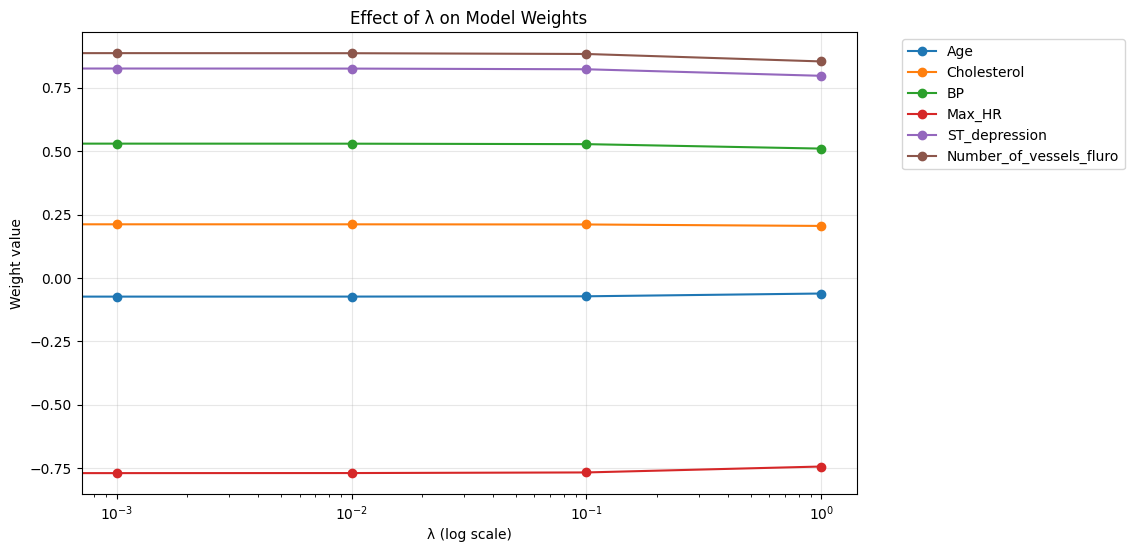

In [117]:
# Display results
results_df = pd.DataFrame(results)
print("Result of Regularization:")
print(results_df[['lambda', 'accuracy', 'weight_magnitude']])

# Plot weight values vs λ
plt.figure(figsize=(10, 6))
for i in range(len(selected_features)):
    weights_i = [r['weights'][i] for r in results]
    plt.plot(lambda_values, weights_i, 'o-', label=selected_features[i])

plt.xscale('log')
plt.xlabel('λ (log scale)')
plt.ylabel('Weight value')
plt.title('Effect of λ on Model Weights')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.show()

Model without regularization (λ=0)
Boundary equation for Age vs Cholesterol:
0.0659*Age + 0.1797*Cholesterol + -0.1934 = 0

Model with regularization (λ=0.0)
Boundary equation for Age vs Cholesterol::
-0.0736*Age + 0.2114*Cholesterol + -0.1938 = 0


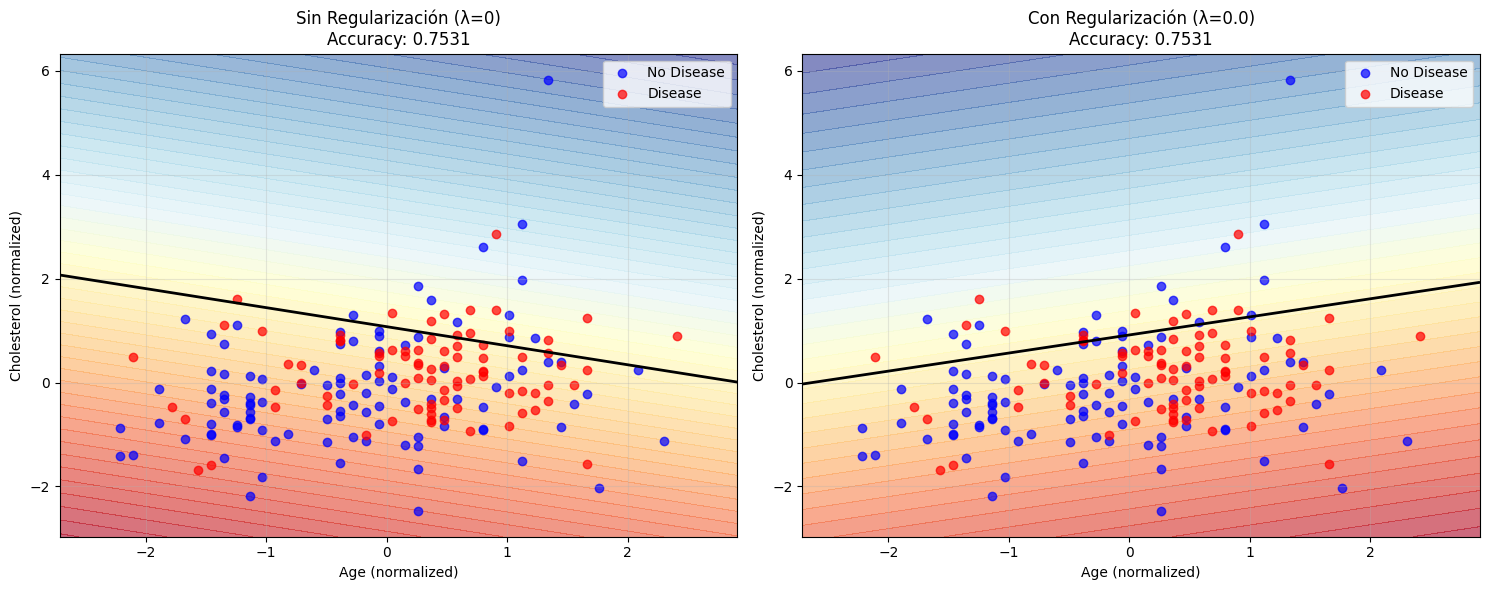

In [118]:
# Compare border without vs with regularization

# 1. Model without regularization
print("Model without regularization (λ=0)")
print(f"Boundary equation for Age vs Cholesterol:")
print(f"{w_opt[0]:.4f}*Age + {w_opt[1]:.4f}*Cholesterol + {b_opt:.4f} = 0")

# 2. Model with the best λ according to results
best_idx = results_df['accuracy'].idxmax()
best_lambda = results_df.loc[best_idx, 'lambda']
best_weights = results[best_idx]['weights']
best_bias = b_reg  # del último entrenamiento con ese λ

print(f"\nModel with regularization (λ={best_lambda})")
print(f"Boundary equation for Age vs Cholesterol::")
print(f"{best_weights[0]:.4f}*Age + {best_weights[1]:.4f}*Cholesterol + {best_bias:.4f} = 0")

# Visualize comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Without regularization
x1 = X_train_norm[:, 0]
x2 = X_train_norm[:, 1]
x1_min, x1_max = x1.min() - 0.5, x1.max() + 0.5
x2_min, x2_max = x2.min() - 0.5, x2.max() + 0.5

# Left plot: without regularization
ax = axes[0]
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 200),
                       np.linspace(x2_min, x2_max, 200))
grid_points = np.c_[xx1.ravel(), xx2.ravel()]
z_grid_no_reg = grid_points @ w_opt[:2] + b_opt
probs_grid_no_reg = sigmoid(z_grid_no_reg).reshape(xx1.shape)

ax.contourf(xx1, xx2, probs_grid_no_reg, levels=50, cmap='RdYlBu', alpha=0.6)
ax.contour(xx1, xx2, probs_grid_no_reg, levels=[0.5], colors='black', linewidths=2)
ax.scatter(x1[y_train == 0], x2[y_train == 0], color='blue', label='No Disease', alpha=0.7)
ax.scatter(x1[y_train == 1], x2[y_train == 1], color='red', label='Disease', alpha=0.7)
ax.set_title(f'Sin Regularización (λ=0)\nAccuracy: {results_df.loc[0, "accuracy"]:.4f}')
ax.set_xlabel('Age (normalized)')
ax.set_ylabel('Cholesterol (normalized)')
ax.legend()
ax.grid(alpha=0.3)

# Right plot: with regularization
ax = axes[1]
z_grid_reg = grid_points @ best_weights[:2] + best_bias
probs_grid_reg = sigmoid(z_grid_reg).reshape(xx1.shape)

ax.contourf(xx1, xx2, probs_grid_reg, levels=50, cmap='RdYlBu', alpha=0.6)
ax.contour(xx1, xx2, probs_grid_reg, levels=[0.5], colors='black', linewidths=2)
ax.scatter(x1[y_train == 0], x2[y_train == 0], color='blue', label='No Disease', alpha=0.7)
ax.scatter(x1[y_train == 1], x2[y_train == 1], color='red', label='Disease', alpha=0.7)
ax.set_title(f'Con Regularización (λ={best_lambda})\nAccuracy: {results_df.loc[best_idx, "accuracy"]:.4f}')
ax.set_xlabel('Age (normalized)')
ax.set_ylabel('Cholesterol (normalized)')
ax.legend()
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [119]:
# Save final model (best λ)
best_lambda = results_df.loc[results_df['accuracy'].idxmax(), 'lambda']
print(f"\nBest λ found: {best_lambda}")

# Re-train final model with better λ
w_final_reg, b_final_reg, _ = gradient_descent_reg(
    X_train_norm, y_train,
    w_opt, b_opt,
    alpha=0.01, lambda_=best_lambda, num_iters=2000
)

# Inference class (deployment simulation)
class HeartDiseasePredictor:
    def __init__(self, w, b, feature_names, mean, std):
        self.w = w
        self.b = b
        self.feature_names = feature_names
        self.mean = mean
        self.std = std
    
    def preprocess(self, patient_features):
        features_array = np.array(patient_features).reshape(1, -1)
        features_norm = (features_array - self.mean) / self.std
        return features_norm
    
    def predict_proba(self, patient_features):
        X_norm = self.preprocess(patient_features)
        prob = sigmoid(X_norm @ self.w + self.b)
        return prob[0]
    
    def predict(self, patient_features, threshold=0.5):
        prob = self.predict_proba(patient_features)
        return 1 if prob >= threshold else 0

predictor = HeartDiseasePredictor(
    w_final_reg, b_final_reg,
    selected_features,
    train_mean, train_std
)

print("\nInference test")
test_cases = [
    [58, 250, 140, 160, 1.5, 0],  # Patient 1
    [45, 180, 120, 180, 0.0, 0],  # Patient 2
    [70, 320, 160, 120, 3.0, 3],  # Patient 3
]

for i, patient in enumerate(test_cases, 1):
    prob = predictor.predict_proba(patient)
    pred = predictor.predict(patient)
    risk_level = "HIGH RISK" if pred == 1 else "LOW RISK"
    
    print(f"\nPatient {i}:")
    for name, value in zip(selected_features, patient):
        print(f"  {name}: {value}")
    print(f"  Probability of disease: {prob:.2%}")
    print(f"  Prediction: {risk_level}")


Best λ found: 0.0

Inference test

Patient 1:
  Age: 58
  Cholesterol: 250
  BP: 140
  Max_HR: 160
  ST_depression: 1.5
  Number_of_vessels_fluro: 0
  Probability of disease: 33.11%
  Prediction: LOW RISK

Patient 2:
  Age: 45
  Cholesterol: 180
  BP: 120
  Max_HR: 180
  ST_depression: 0.0
  Number_of_vessels_fluro: 0
  Probability of disease: 3.54%
  Prediction: LOW RISK

Patient 3:
  Age: 70
  Cholesterol: 320
  BP: 160
  Max_HR: 120
  ST_depression: 3.0
  Number_of_vessels_fluro: 3
  Probability of disease: 99.65%
  Prediction: HIGH RISK


### Save Model for SageMaker

In [ ]:
import json

model_data = {
    'weights': w_final_reg.tolist(),
    'bias': float(b_final_reg),
    'feature_names': selected_features,
    'normalization_params': {
        'mean': train_mean.tolist(),
        'std': train_std.tolist()
    },
    'training_info': {
        'lambda': float(best_lambda),
        'alpha': 0.01,
        'iterations': 2000,
        'final_accuracy': float(results_df.loc[best_idx, 'accuracy'])
    }
}

# JSON
with open('heart_disease_model.json', 'w') as f:
    json.dump(model_data, f, indent=2)

print("Model saved in 'heart_disease_model.json'")
print("\nStructure of the saved model:")
print(f"- Weights (w): {len(w_final_reg)} values")
print(f"- Bias (b): {b_final_reg:.6f}")
print(f"- Features: {selected_features}")
print(f"- Normalization parameters: mean and std for each feature")